## <span style="color:black"> For loading MoE models and deal with them </span>


In [6]:
import sys
sys.path.insert(1, '/home/stefano/Desktop/Stefano/scuola/uni/tesi_magistrale/code/routines')
from GW_helper import *
import matplotlib.pyplot as plt
from ML_routines import *

In [25]:
    #loading datasets
train_theta = np.loadtxt("../datasets/PCA_train_theta.dat")
test_theta = np.loadtxt("../datasets/PCA_test_theta.dat")

train_frac = float(train_theta.shape[1])/float(train_theta.shape[1] + test_theta.shape[1])
theta_vector = np.concatenate((train_theta, test_theta), axis=0)
PCA_train_ph = np.loadtxt("../datasets/PCA_train_s0.dat")
PCA_test_ph = np.loadtxt("../datasets/PCA_test_s0.dat")

    #loading PCA s0 model
ph_PCA_s0 = PCA_model()
ph_PCA_s0.load_model("../datasets/PCA_std_model_s0.dat")

    #loading PCA std model
ph_PCA_s0_full = PCA_model()
ph_PCA_s0_full.load_model("../datasets/PCA_std_model.dat")

Some lines to create dataset at same q as the s0 one

In [ ]:
ph_dataset = np.zeros((theta_vector.shape[0], 2048))
f_max = 1000.
f_low = 20.
f_step = 1e-2
spin_mag_max = .8
K = int((f_max-f_low)/f_step)
LALpars = lal.CreateDict()
approx = lalsim.SimInspiralGetApproximantFromString("IMRPhenomPv2")
N_grid = ph_dataset.shape[1]
freq_to_choose = np.arange(0, K, K/N_grid).astype(int)
m2 = 10.
for i in range(theta_vector.shape[0]):
    if i%1000 == 0 and i != 0:
        print("Generated WF ", i, " of ",theta_vector.shape[0])
    spin1z = np.random.uniform(-spin_mag_max,spin_mag_max)
    spin2z = 0.#np.random.uniform(-spin_mag_max,spin_mag_max)
    #break
    hptilde, hctilde = lalsim.SimInspiralChooseFDWaveform( #where is its definition and documentation????
            theta_vector[i,0]*m2*lalsim.lal.MSUN_SI, #m1
            m2*lalsim.lal.MSUN_SI, #m2
            0, 0, spin1z, #spin vector 1
            0, 0, spin2z, #spin vector 2
            1e6*lalsim.lal.PC_SI, #distance to source
            0, #inclination
            0, #something I don't know
            0, #longAscNodes
            0, #eccentricity
            0, #meanPerAno
            f_step, # frequency incremental step
            f_low, # lowest value of frequency
            f_max, # highest value of frequency
            f_low, #some reference value of frequency (??)
            LALpars, #some lal dictionary
            approx #approx method for the model
            )
    h = np.array(hptilde.data.data)+1j*np.array(hctilde.data.data) #complex waveform
    theta_vector[i,1] = spin1z
    theta_vector[i,2] = spin2z
    temp_ph = (np.unwrap(np.angle(h))[int(f_low/f_step):int(f_max/f_step)].real)[freq_to_choose]
    
        #removing spourious gaps (if present)
    ph_diff = np.concatenate((temp_ph[1:],np.array([temp_ph[-1]]))) - temp_ph
         #looking for big discontinuities in the second half of the grid
    index_max = np.argmax(np.abs(ph_diff[int(N_grid/2):]))+int(N_grid/2) 
    if np.abs(ph_diff[index_max-1]) * np.abs(ph_diff[index_max+1]) < 1e-3:
        temp_ph[index_max:] = temp_ph[index_max-1]
        
        #saving to dataset
    ph_dataset[i,:] = temp_ph

        #saving everything
PCA_dataset_full_ph = ph_PCA.reduce_data(ph_dataset)
to_save = np.concatenate((theta_vector, PCA_dataset_full_ph), axis = 1)
np.savetxt("../datasets/GW_std_dataset_s0_full.dat", to_save)

Creating PCA model and preprocessing data

In [ ]:
    #loading data of full dataset
loaded_data = np.loadtxt("../datasets/GW_std_dataset_s0_full.dat")
theta_vector_full = loaded_data[:,0:3]
ph_dataset_s0_full = loaded_data[:,3:]

PCA_train_ph = ph_dataset_s0_full[:int(train_frac*ph_dataset_s0_full.shape[0]),:]
PCA_test_ph = ph_dataset_s0_full[int(train_frac*ph_dataset_s0_full.shape[0]):,:]

print(PCA_train_ph.shape, PCA_test_ph.shape)

Now it's time to do something useful

In [38]:
PCA_dataset = 

<IPython.core.display.Javascript object>


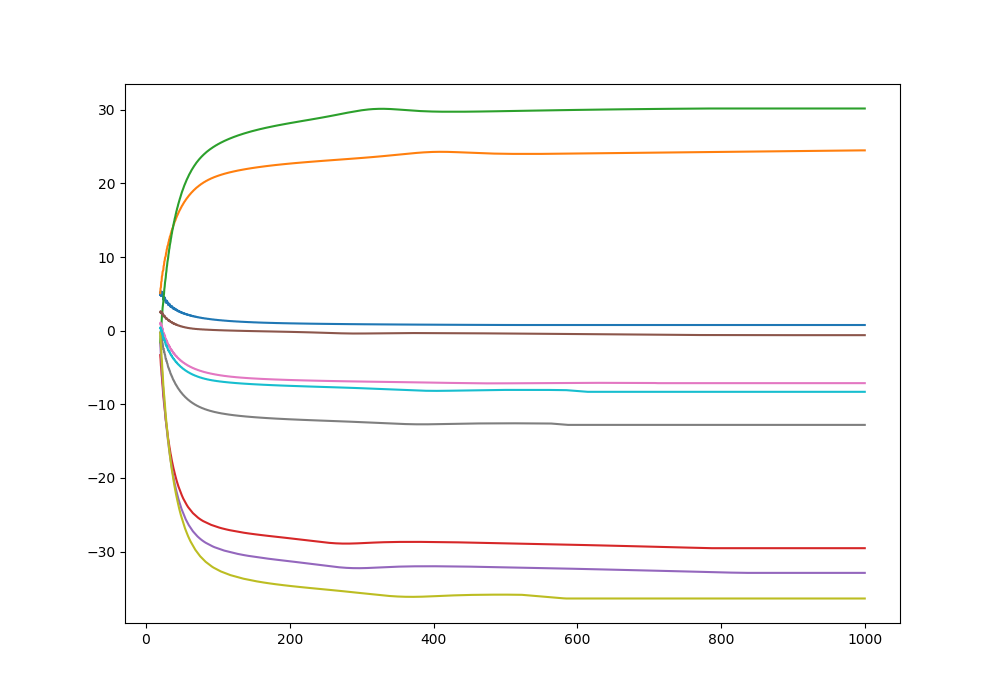

In [64]:
plt.figure(figsize=(10,7))
for i in range(10):
    #plt.plot(frequencies, ph_dataset_s0_full[i,:]-ph_dataset_s0_full[11,:])
    plt.plot(frequencies, diff_vector[i,:])
    #plt.yscale('log')
plt.show()

Now we look at the actual dataset to see whether there are discontinuities

In [40]:
theta_vector, amp_dataset, ph_dataset, frequencies = load_dataset("../datasets/GW_std_dataset.dat", shuffle=False, N_grid = None) #loading dataset

In [41]:
PCA_train_ph = np.loadtxt("../datasets/PCA_train.dat")
PCA_test_ph = np.loadtxt("../datasets/PCA_test.dat")

<IPython.core.display.Javascript object>


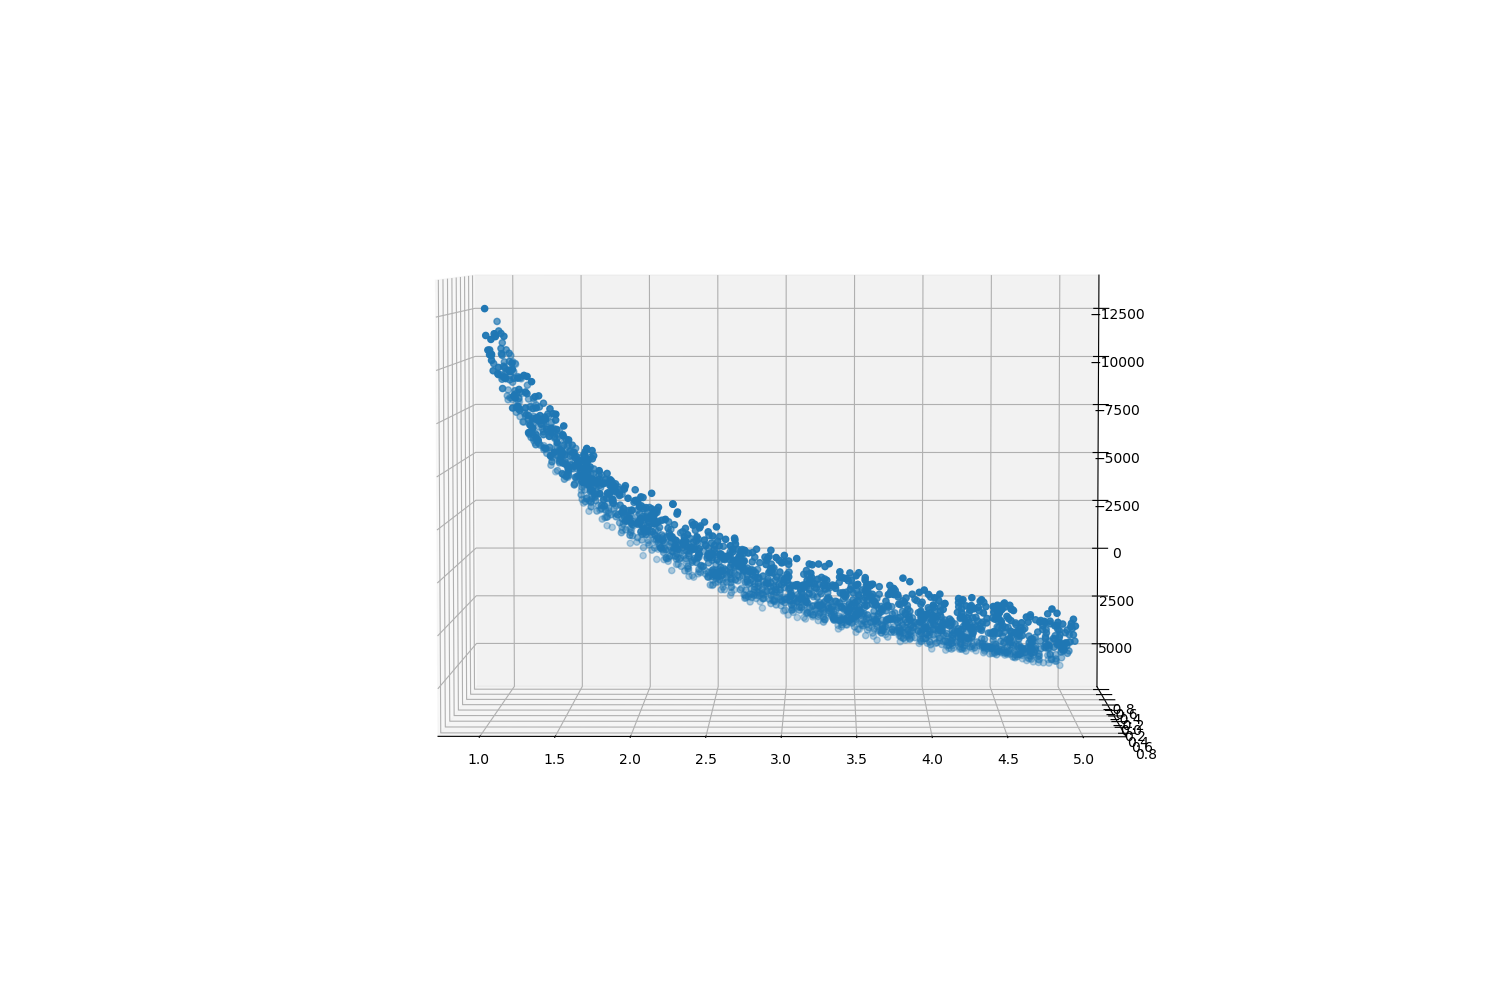

In [59]:
from mpl_toolkits import mplot3d
%matplotlib notebook
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(theta_vector[PCA_train_ph.shape[0]:,0],theta_vector[PCA_train_ph.shape[0]:,1], PCA_test_ph[:,0],'o')
#ax.plot_trisurf(theta_vector[:PCA_train_ph.shape[0],0],theta_vector[:PCA_train_ph.shape[0],1], PCA_train_ph[:,0], cmap='viridis', edgecolor='none')
ax.view_init(60, 35)
plt.show()